C:\Users\Sihai\AppData\Local\Temp\ipykernel_25920\941539783.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer
C:\Users\Sihai\AppData\Local\Temp\ipykernel_25920\941539783.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']
C:\Users\Sihai\AppData\Local\Temp\ipykernel_25920\941539783.py:30: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


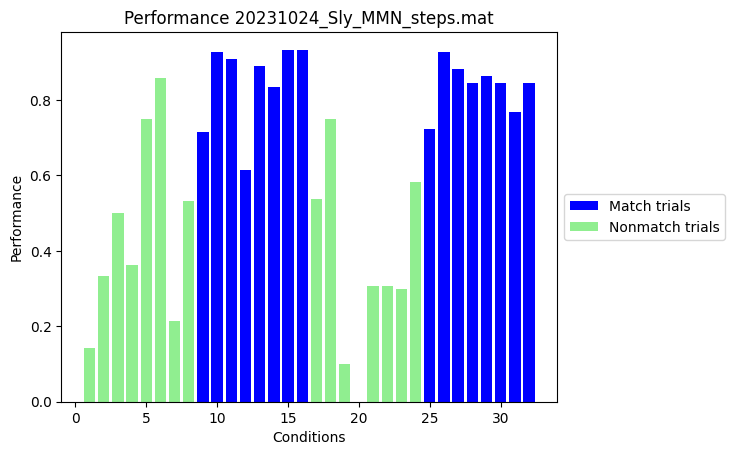

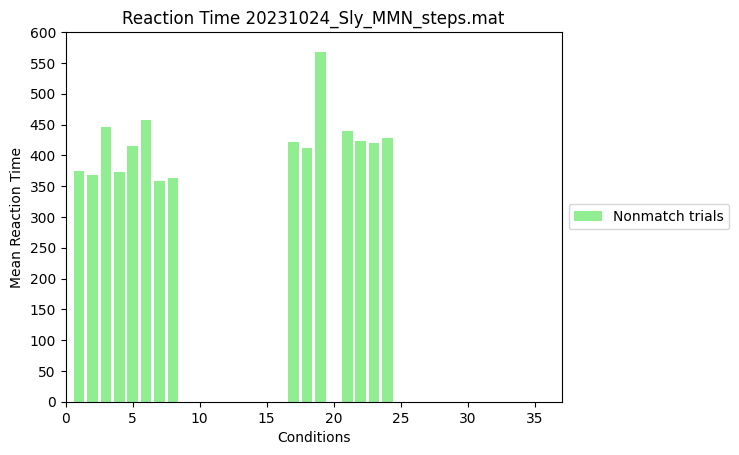

finished


In [16]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Load data
name = "20231024_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
filename = dict_path + name
data = scipy.io.loadmat(filename)

beh = data['beh'][0]
beh_df = pd.DataFrame(beh)

num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

overall_cond = np.zeros(num_cond)
correct_cond = np.zeros(num_cond)
RT_cond = np.full((num_cond, 200), np.nan)

for _, row in beh_df.iterrows():
    for i in range(1, num_cond + 1):  # MATLAB indices start from 1
        if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
            overall_cond[i-1] += 1  # Adjust for 0-based indexing

            if row['TrialError'] == 0:
                correct_cond[i-1] += 1
                RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

mean_RT = np.nanmean(RT_cond, axis=1)
cond_performance = correct_cond / overall_cond

# Plotting Performance
plt.figure()
plt.bar(range(1, num_cond+1), cond_performance, color='blue', label='Match trials')
plt.xlabel('Conditions')
plt.ylabel('Performance')
plt.title('Performance ' + name)


# Change color for specific bars to light green
plt.bar(range(1, 9), cond_performance[:8], color='lightgreen', label='Nonmatch trials')
plt.bar(range(17, 25), cond_performance[16:24], color='lightgreen')  # Assuming there are at least 24 conditions

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting Reaction Time
plt.figure()
plt.bar(range(1, num_cond+1), mean_RT, color='lightgreen', label='Nonmatch trials')
plt.xlabel('Conditions')
plt.ylabel('Mean Reaction Time')
plt.title('Reaction Time ' + name)

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 37)
plt.yticks(range(0, 601, 50))
plt.show()

print('finished')


C:\Users\Sihai\AppData\Local\Temp\ipykernel_32908\220236221.py:30: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


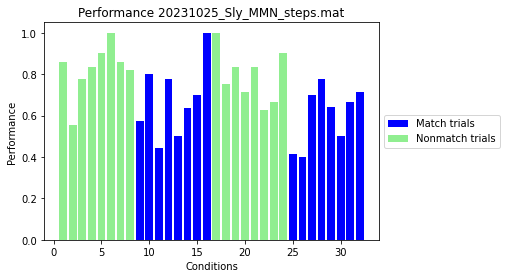

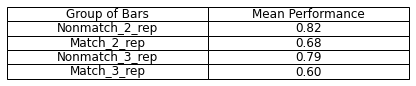

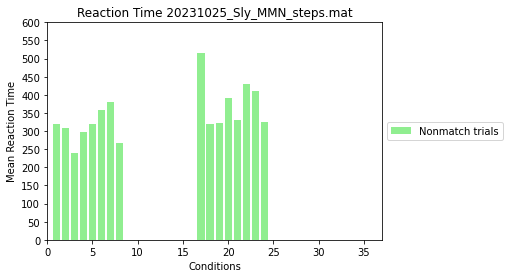

finished


In [9]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Load data
name = "20231025_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
filename = dict_path + name
data = scipy.io.loadmat(filename)

beh = data['beh'][0]
beh_df = pd.DataFrame(beh)

num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

overall_cond = np.zeros(num_cond)
correct_cond = np.zeros(num_cond)
RT_cond = np.full((num_cond, 200), np.nan)

for _, row in beh_df.iterrows():
    for i in range(1, num_cond + 1):  # MATLAB indices start from 1
        if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
            overall_cond[i-1] += 1  # Adjust for 0-based indexing

            if row['TrialError'] == 0:
                correct_cond[i-1] += 1
                RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

mean_RT = np.nanmean(RT_cond, axis=1)
cond_performance = correct_cond / overall_cond

# Plotting Performance
plt.figure()
plt.bar(range(1, num_cond+1), cond_performance, color='blue', label='Match trials')
plt.xlabel('Conditions')
plt.ylabel('Performance')
plt.title('Performance ' + name)


# Change color for specific bars to light green
plt.bar(range(1, 9), cond_performance[:8], color='lightgreen', label='Nonmatch trials')
plt.bar(range(17, 25), cond_performance[16:24], color='lightgreen')  # Assuming there are at least 24 conditions

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Calculate mean performance for different groups of bars
mean_performance_1_8 = np.mean(cond_performance[:8])
mean_performance_9_16 = np.mean(cond_performance[8:16])
mean_performance_17_24 = np.mean(cond_performance[16:24])
mean_performance_25_32 = np.mean(cond_performance[24:32])


# Define the data
data = {'Group of Bars': ['Nonmatch_2_rep', 'Match_2_rep', 'Nonmatch_3_rep', 'Match_3_rep'],
        'Mean Performance': [mean_performance_1_8, mean_performance_9_16, mean_performance_17_24, mean_performance_25_32]}

# Create a DataFrame
df = pd.DataFrame(data)

# Format the 'Mean Performance' column to have only two digits after the decimal point
df['Mean Performance'] = df['Mean Performance'].apply(lambda x: f'{x:.2f}')

# Create a table
fig, ax = plt.subplots(figsize=(6, 1)) # Adjust the figsize as needed
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc = 'center')

# Set table properties
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.2) # Adjust the scaling as needed

plt.show()

# Plotting Reaction Time
plt.figure()
plt.bar(range(1, num_cond+1), mean_RT, color='lightgreen', label='Nonmatch trials')
plt.xlabel('Conditions')
plt.ylabel('Mean Reaction Time')
plt.title('Reaction Time ' + name)

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 37)
plt.yticks(range(0, 601, 50))
plt.show()

print('finished')


C:\Users\Sihai\AppData\Local\Temp\ipykernel_25920\1621916656.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer
C:\Users\Sihai\AppData\Local\Temp\ipykernel_25920\1621916656.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']
C:\Users\Sihai\AppData\Local\Temp\ipykernel_25920\1621916656.py:30: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


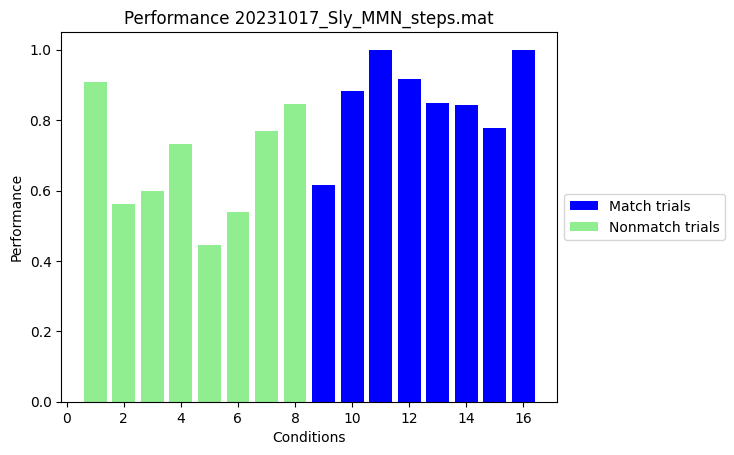

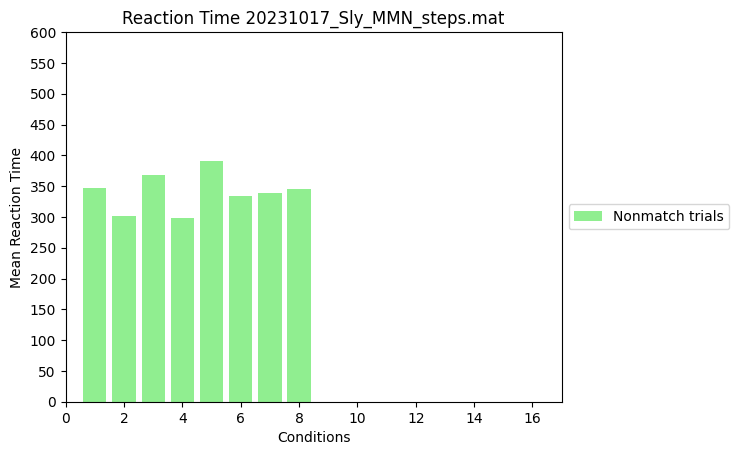

finished


In [19]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Load data
name = "20231017_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
filename = dict_path + name
data = scipy.io.loadmat(filename)

beh = data['beh'][0]
beh_df = pd.DataFrame(beh)

num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

overall_cond = np.zeros(num_cond)
correct_cond = np.zeros(num_cond)
RT_cond = np.full((num_cond, 200), np.nan)

for _, row in beh_df.iterrows():
    for i in range(1, num_cond + 1):  # MATLAB indices start from 1
        if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
            overall_cond[i-1] += 1  # Adjust for 0-based indexing

            if row['TrialError'] == 0:
                correct_cond[i-1] += 1
                RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

mean_RT = np.nanmean(RT_cond, axis=1)
cond_performance = correct_cond / overall_cond

# Plotting Performance
plt.figure()
plt.bar(range(1, num_cond+1), cond_performance, color='blue', label='Match trials')
plt.xlabel('Conditions')
plt.ylabel('Performance')
plt.title('Performance ' + name)


# Change color for specific bars to light green
plt.bar(range(1, 9), cond_performance[:8], color='lightgreen', label='Nonmatch trials')


# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting Reaction Time
plt.figure()
plt.bar(range(1, num_cond+1), mean_RT, color='lightgreen', label='Nonmatch trials')
plt.xlabel('Conditions')
plt.ylabel('Mean Reaction Time')
plt.title('Reaction Time ' + name)

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 17)
plt.yticks(range(0, 601, 50))
plt.show()

print('finished')


C:\Users\Sihai\AppData\Local\Temp\ipykernel_25920\3640790953.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer
C:\Users\Sihai\AppData\Local\Temp\ipykernel_25920\3640790953.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']
C:\Users\Sihai\AppData\Local\Temp\ipykernel_25920\3640790953.py:30: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


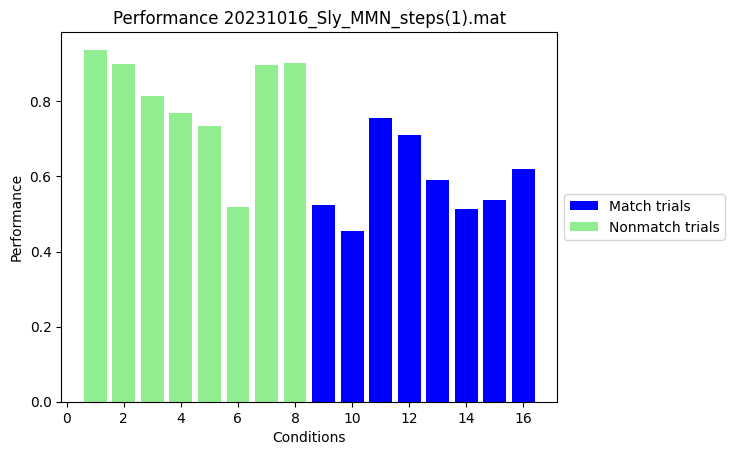

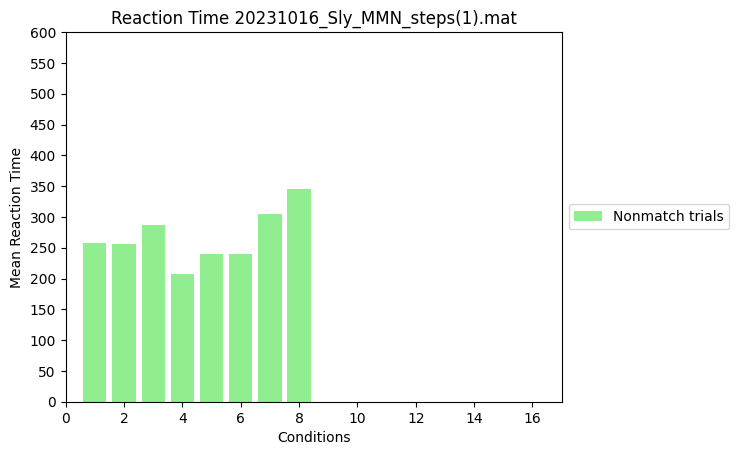

finished


In [20]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Load data
name = "20231016_Sly_MMN_steps(1).mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
filename = dict_path + name
data = scipy.io.loadmat(filename)

beh = data['beh'][0]
beh_df = pd.DataFrame(beh)

num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

overall_cond = np.zeros(num_cond)
correct_cond = np.zeros(num_cond)
RT_cond = np.full((num_cond, 200), np.nan)

for _, row in beh_df.iterrows():
    for i in range(1, num_cond + 1):  # MATLAB indices start from 1
        if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
            overall_cond[i-1] += 1  # Adjust for 0-based indexing

            if row['TrialError'] == 0:
                correct_cond[i-1] += 1
                RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

mean_RT = np.nanmean(RT_cond, axis=1)
cond_performance = correct_cond / overall_cond

# Plotting Performance
plt.figure()
plt.bar(range(1, num_cond+1), cond_performance, color='blue', label='Match trials')
plt.xlabel('Conditions')
plt.ylabel('Performance')
plt.title('Performance ' + name)


# Change color for specific bars to light green
plt.bar(range(1, 9), cond_performance[:8], color='lightgreen', label='Nonmatch trials')


# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting Reaction Time
plt.figure()
plt.bar(range(1, num_cond+1), mean_RT, color='lightgreen', label='Nonmatch trials')
plt.xlabel('Conditions')
plt.ylabel('Mean Reaction Time')
plt.title('Reaction Time ' + name)

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 17)
plt.yticks(range(0, 601, 50))
plt.show()

print('finished')

C:\Users\Sihai\AppData\Local\Temp\ipykernel_32908\2638954746.py:30: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


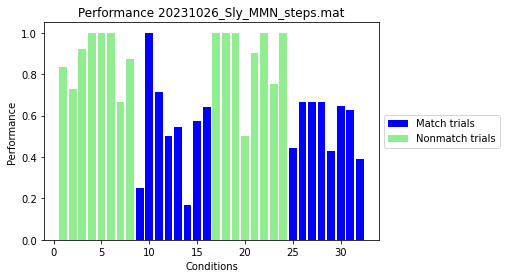

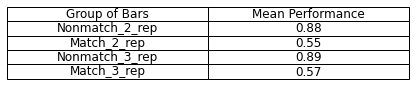

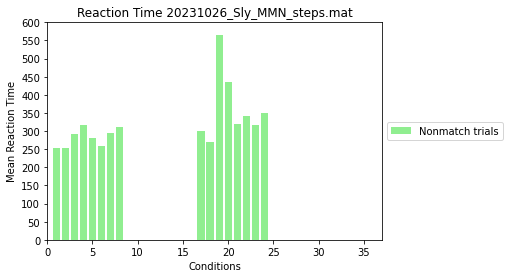

finished


In [11]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Load data
name = "20231026_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
filename = dict_path + name
data = scipy.io.loadmat(filename)

beh = data['beh'][0]
beh_df = pd.DataFrame(beh)

num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

overall_cond = np.zeros(num_cond)
correct_cond = np.zeros(num_cond)
RT_cond = np.full((num_cond, 200), np.nan)

for _, row in beh_df.iterrows():
    for i in range(1, num_cond + 1):  # MATLAB indices start from 1
        if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
            overall_cond[i-1] += 1  # Adjust for 0-based indexing

            if row['TrialError'] == 0:
                correct_cond[i-1] += 1
                RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

mean_RT = np.nanmean(RT_cond, axis=1)
cond_performance = correct_cond / overall_cond

# Plotting Performance
plt.figure()
plt.bar(range(1, num_cond+1), cond_performance, color='blue', label='Match trials')
plt.xlabel('Conditions')
plt.ylabel('Performance')
plt.title('Performance ' + name)


# Change color for specific bars to light green
plt.bar(range(1, 9), cond_performance[:8], color='lightgreen', label='Nonmatch trials')
plt.bar(range(17, 25), cond_performance[16:24], color='lightgreen')  # Assuming there are at least 24 conditions

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Calculate mean performance for different groups of bars
mean_performance_1_8 = np.mean(cond_performance[:8])
mean_performance_9_16 = np.mean(cond_performance[8:16])
mean_performance_17_24 = np.mean(cond_performance[16:24])
mean_performance_25_32 = np.mean(cond_performance[24:32])


# Define the data
data = {'Group of Bars': ['Nonmatch_2_rep', 'Match_2_rep', 'Nonmatch_3_rep', 'Match_3_rep'],
        'Mean Performance': [mean_performance_1_8, mean_performance_9_16, mean_performance_17_24, mean_performance_25_32]}

# Create a DataFrame
df = pd.DataFrame(data)

# Format the 'Mean Performance' column to have only two digits after the decimal point
df['Mean Performance'] = df['Mean Performance'].apply(lambda x: f'{x:.2f}')

# Create a table
fig, ax = plt.subplots(figsize=(6, 1)) # Adjust the figsize as needed
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc = 'center')

# Set table properties
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.2) # Adjust the scaling as needed

plt.show()

# Plotting Reaction Time
plt.figure()
plt.bar(range(1, num_cond+1), mean_RT, color='lightgreen', label='Nonmatch trials')
plt.xlabel('Conditions')
plt.ylabel('Mean Reaction Time')
plt.title('Reaction Time ' + name)

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 37)
plt.yticks(range(0, 601, 50))
plt.show()

print('finished')
